# [T07] Laporan Proyek: Smoothing dan Noise Reduction pada Citra CCTV
### kelompok
- Rizky Cahyono Putra - 442023611012
- Syaifan Noer Iwawan - 442023611008
- M. Irfansyah - 442023611004
- Muhammad Galang Fachrezy - 442023611011
- Achmad Fatich Al-fahmi - 422021611002
## Pendahuluan
Laporan dalam bentuk notebook ini bertujuan untuk mendiskusikan dan mengeksplorasi teknik dasar smoothing dan noise reduction pada citra digital. Studi kasus yang kami angkat adalah peredaman noise pada citra yang menyerupai tangkapan kamera CCTV berkualitas rendah.

Kami akan memulai dengan mengambil sebuah citra bersih, memberikan simulasi noise "Salt & Pepper" secara manual, kemudian menerapkan tiga jenis filter dasar: Mean Filter, Median Filter, dan Gaussian Blur. Hasil dari setiap filter akan divisualisasikan dan dibandingkan untuk dianalisis kelebihan serta kekurangannya.

## Setup Awal & Impor Library
Penjelasan Konseptual: Langkah pertama adalah menyiapkan lingkungan kerja. Kita akan mengimpor library yang dibutuhkan: OpenCV (cv2) untuk operasi pengolahan citra, NumPy untuk manipulasi array, Matplotlib untuk visualisasi, dan urllib untuk mengunduh gambar contoh secara otomatis.

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
print(" Library berhasil diimpor dan siap digunakan.")
print(f"Versi OpenCV: {cv2.__version__}")

 Library berhasil diimpor dan siap digunakan.
Versi OpenCV: 4.11.0


## Load Data
Penjelasan Konseptual: Untuk studi kasus ini, kita memerlukan sebuah gambar. Agar eksperimen terkontrol, kita akan menggunakan sebuah gambar jalanan yang bersih dari internet, lalu menambahkan noise secara manual. Ini memungkinkan kita untuk memiliki gambar "ground truth" (asli bersih) sebagai pembanding yang sempurna.

gambar yang berhasil dimuat dan dirubah menjadi grayscale
Dimensi gambar: 1024 x 670 piksel


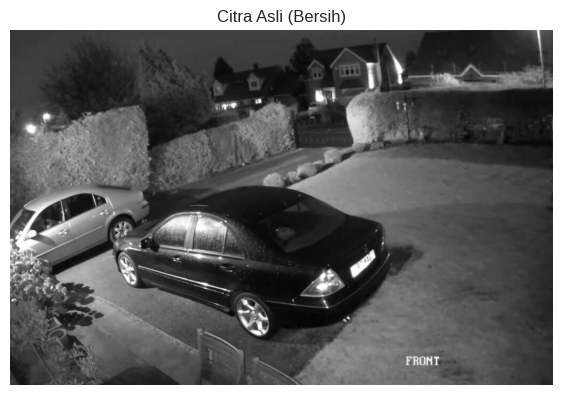

In [10]:
PATH = "/kaggle/input/sound-girl-saying-hello-and-mouse-click/cctv.jpg"

# baca gambar menggunakan opencv, dan rubah menjadi hitaputih
citra_bersih = cv2.imread(PATH, cv2.IMREAD_GRAYSCALE)

print("gambar yang berhasil dimuat dan dirubah menjadi grayscale")
print(f"Dimensi gambar: {citra_bersih.shape[1]} x {citra_bersih.shape[0]} piksel")

#visualisasi
plt.figure(figsize=(7, 7))
plt.imshow(citra_bersih, cmap='gray')
plt.title("Citra Asli (Bersih)")
plt.axis('off')
plt.show()

## Menambahkan simulasi Noise
Penjelasan Konseptual: Citra CCTV seringkali mengalami gangguan berupa bintik-bintik putih dan hitam acak. Jenis noise ini disebut "Salt & Pepper". Kita akan membuat fungsi untuk menambahkan noise ini ke citra bersih kita untuk mensimulasikan tangkapan CCTV berkualitas rendah.

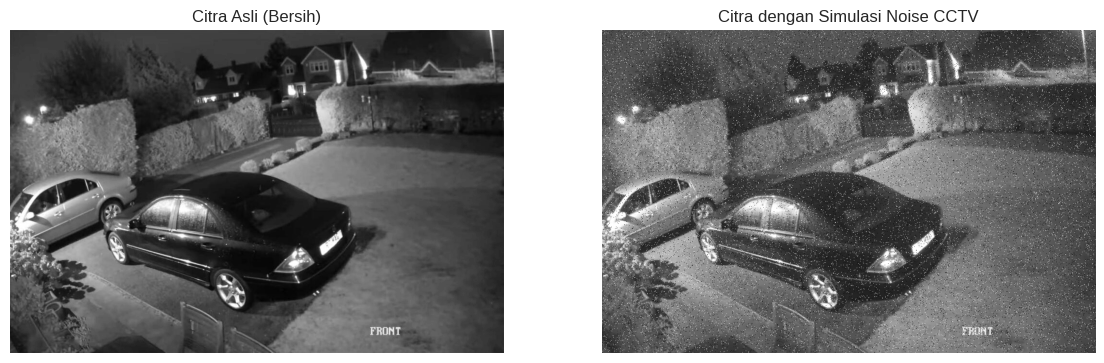

In [11]:
def tambah_salt_pepper(gambar, amount=0.05):
    """Menambahkan noise Salt & Pepper ke sebuah gambar."""
    noisy_image = np.copy(gambar)
    # Menambahkan bintik putih (salt)
    num_salt = np.ceil(amount * gambar.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in gambar.shape]
    noisy_image[tuple(coords)] = 255

    # Menambahkan bintik hitam (pepper)
    num_pepper = np.ceil(amount * gambar.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in gambar.shape]
    noisy_image[tuple(coords)] = 0
    
    return noisy_image

# --- Terapkan Noise pada Citra ---
citra_noisy = tambah_salt_pepper(citra_bersih, amount=0.05) # 5% noise

# --- Visualisasi Perbandingan ---
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(citra_bersih, cmap='gray')
plt.title("Citra Asli (Bersih)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(citra_noisy, cmap='gray')
plt.title("Citra dengan Simulasi Noise CCTV")
plt.axis('off')

plt.show()


## Menrapkan berbagai filter Smoothing
*Penjelasan Konseptual*: Sekarang kita akan menerapkan tiga jenis filter smoothing yang berbeda pada citra yang sudah diberi noise. Setiap filter memiliki cara kerja dan karakteristik yang berbeda dalam meredam noise. Kita akan menggunakan ukuran kernel 5x5 untuk semua filter agar perbandingannya adil.

In [12]:
#ukuran kernel
kernel_size = 5

#mean filter
hasil_mean = cv2.blur(citra_noisy, (kernel_size, kernel_size))

# median filter
hasil_median = cv2.medianBlur(citra_noisy, kernel_size)

#Gaussian Blur
hasil_gaussian = cv2.GaussianBlur(citra_noisy, (kernel_size, kernel_size), 0)

print("ketiga filter sudah berhasil")

ketiga filter sudah berhasil


## Visualisasi dan Perbandingan Hasil
*Penjelasan Konseptual*: Ini adalah tahap paling penting, di mana kita membandingkan hasil dari setiap filter secara visual. Dengan melihatnya berdampingan, kita bisa langsung menganalisis keefektifan masing-masing metode.

<function matplotlib.pyplot.show(close=None, block=None)>

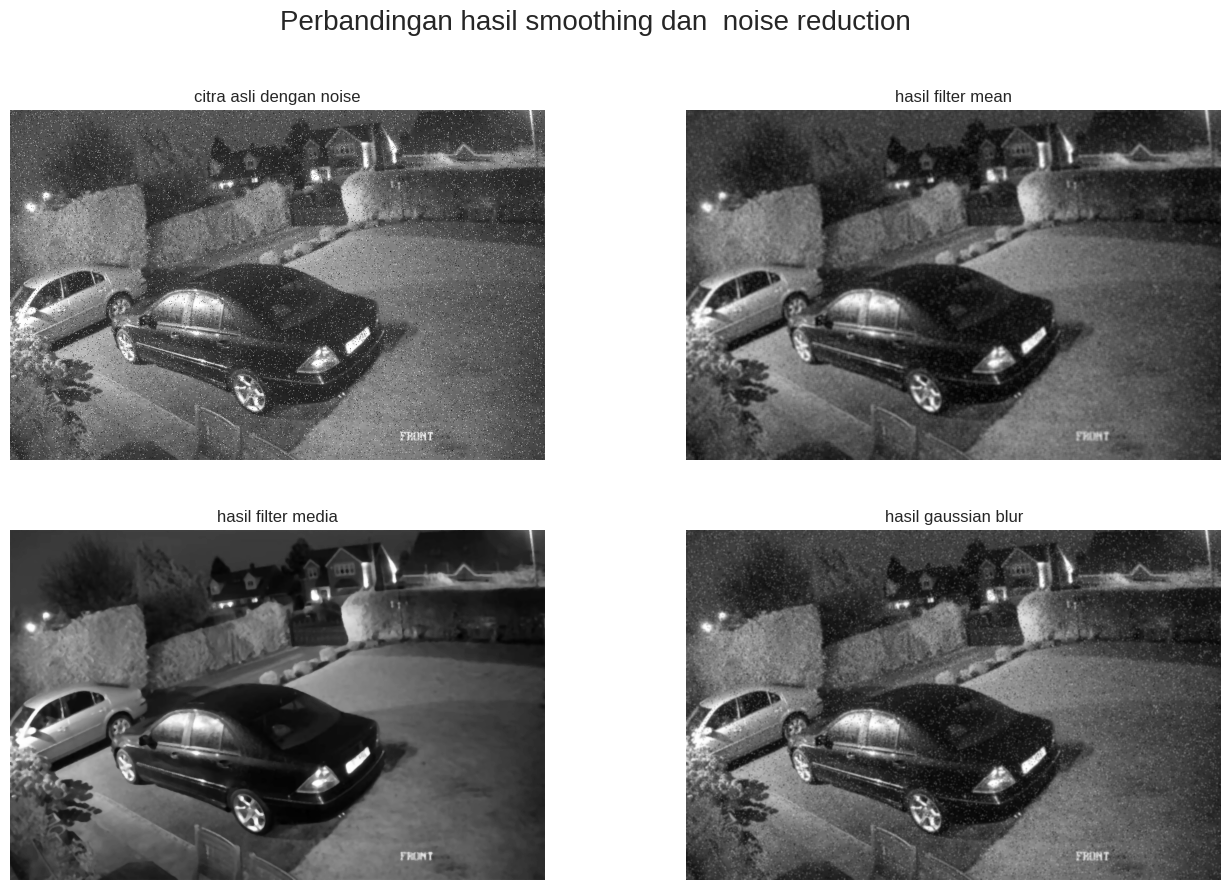

In [13]:
plt.figure(figsize=(16, 10))

# citra asli
plt.subplot(2, 2, 1)
plt.imshow(citra_noisy, cmap='gray')
plt.title('citra asli dengan noise')
plt.axis('off')

# hasil mean
plt.subplot(2, 2, 2)
plt.imshow(hasil_mean, cmap='gray')
plt.title('hasil filter mean')
plt.axis('off')

#hasil median
plt.subplot(2, 2, 3)
plt.imshow(hasil_median, cmap='gray')
plt.title('hasil filter media')
plt.axis('off')

#hasil gaussian blur
plt.subplot(2, 2, 4)
plt.imshow(hasil_gaussian, cmap='gray')
plt.title('hasil gaussian blur')
plt.axis('off')

plt.suptitle("Perbandingan hasil smoothing dan  noise reduction", fontsize=20)
plt.show

## Diskusi Kelompok, Analisis, dan Refleksi
*Penjelasan Konseptual*: Berdasarkan hasil visualisasi di atas, kami melakukan diskusi untuk menganalisis kelebihan dan kekurangan setiap metode.

### **Analisis Hasil Setiap Filter**
1. **Filter Mean**
    - **Hasil**: Terlihat bahwa bintik-bintik noise sedikit berkurang, namun tidak hilang sepenuhnya. Efek samping yang paling jelas adalah seluruh citra menjadi sangat kabur (blur). Detail-detail penting seperti garis pada bangunan dan mobil menjadi hilang.
    - **Kesimpulan**: Kurang efektif untuk meredam noise tipe "Salt & Pepper" dan sangat merusak ketajaman citra.
2. **Filter Median**
   - **Hasil**: Filter ini menunjukkan performa yang **paling unggul**. Hampir semua bintik-bintik hitam dan putih akibat noise berhasil dihilangkan secara efektif. Yang terpenting, ketajaman tepi objek (seperti tepi bangunan atau mobil) tetap terjaga dengan jauh lebih baik dibandingkan filter Mean dan Gaussian.
   - **Kesimpulan**: Sangat efektif untuk meredam noise "Salt & Pepper" (impulse noise) sambil mempertahankan detail penting pada citra.
4. **Filter Gaussian**
   - **Hasil**: Mirip dengan filter Mean, filter ini juga menghasilkan gambar yang lebih halus namun **tetap kabur**. Meskipun blurnya terlihat lebih natural, ia tetap kesulitan menghilangkan noise "Salt & Pepper" secara tuntas dan juga mengorbankan detail citra.
   - **Kesimpulan**: Lebih cocok untuk meredam noise tipe Gaussian (yang lebih merata) daripada "Salt & Pepper".

## Refleksi dan Kesimpulan Akhir
Dari eksperimen ini, kami menyimpulkan bahwa tidak ada satu filter "terbaik" untuk semua jenis masalah. Pemilihan teknik noise reduction harus didasarkan pada **karakteristik spesifik dari noise** yang mengganggu citra. Untuk studi kasus citra CCTV yang sering mengalami gangguan bintik-bintik ekstrem (Salt & Pepper) akibat kerusakan sensor atau transmisi, Median Filter adalah pilihan yang paling superior dan praktis.

Tugas ini memberikan kami pemahaman langsung dan visual tentang bagaimana algoritma-algoritma dasar ini bekerja di dunia nyata dan pentingnya melakukan analisis perbandingan sebelum memilih sebuah metode dalam pengolahan citra.